In [1]:
#import py libraries

In [57]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web

In [22]:
style.use('ggplot')

In [23]:
#define start and end date (dataset time period)

start = dt.datetime(2015,1,1)

end = dt.datetime(2019,12,31)

In [24]:
# grab american express stock prices (ticker AXP) from yahoo website from 2015 til 2019
# 
df_axp = web.DataReader('AXP','yahoo', start,end)

In [25]:
# analyze few raws of the downloaded data
df_axp.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,93.940002,92.139999,93.169998,93.019997,2437500.0,85.268341
2015-01-05,92.779999,90.320000,92.459999,90.559998,3469600.0,83.013344
2015-01-06,90.900002,87.940002,90.790001,88.629997,4800300.0,81.244171
2015-01-07,91.010002,89.529999,91.010002,90.300003,5665200.0,83.018562
2015-01-08,91.809998,91.000000,91.440002,91.580002,3774200.0,84.195335


In [26]:
# this is a pandas Data Frame where Date is the index
type(df_axp)

pandas.core.frame.DataFrame

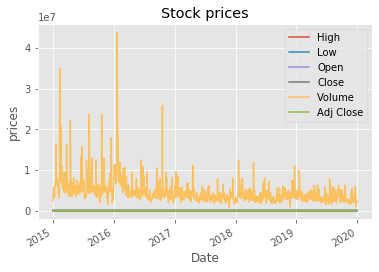

In [30]:
#data visualization
df_axp.plot()
plt.title('Stock prices')
plt.ylabel('prices')
plt.show()

In [33]:
# computing 100 moving average: takes 99 prios prices create an average of those prices (using rolling function)

df_axp['100ma'] =  df_axp['Adj Close'].rolling(window = 100).mean()
# drop the rows where the moving avg is null (because of there is no prices before. 100 days will be dropped)
df_axp.dropna(inplace = True)

In [34]:
df_axp.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2015-05-27,80.629997,79.839996,80.449997,80.110001,5105100.0,73.896393,75.025117
2015-05-28,80.250000,79.879997,79.970001,80.089996,4443000.0,73.877960,74.911213
2015-05-29,80.099998,79.580002,80.040001,79.720001,7385100.0,73.536636,74.816446
2015-06-01,80.169998,78.949997,79.940002,79.470001,4716900.0,73.306030,74.737065
2015-06-02,80.269997,79.180000,79.260002,79.989998,4197300.0,73.785683,74.644736


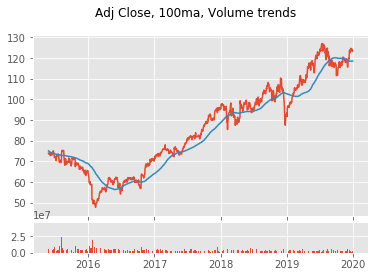

In [62]:
# plot the Adj Close, 100ma and Volume trends in order to compare them
ax1 = plt.subplot2grid((6,1),(0,0),rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot(df_axp.index,df_axp['Adj Close'], label = 'Adj Close')
ax1.plot(df_axp.index,df_axp['100ma'], label = '100 Moving AVG')
ax2.bar(df_axp.index,df_axp['Volume'], label = 'Volume')
plt.suptitle('Adj Close, 100ma, Volume trends')

plt.show()

In [ ]:
# Resample AXP stock prices based on every 10 days of data

In [47]:
df_axp_ohlc = df_axp['Adj Close'].resample('10D').ohlc()

df_axp_volume = df_axp['Volume'].resample('10D').sum()

In [48]:
df_axp_ohlc.head()

,open,high,low,close
Date,,,,
2015-05-27,73.896393,74.348412,73.204575,73.232262
2015-06-06,72.697235,74.071678,72.697235,73.103104
2015-06-16,73.204575,75.049461,73.204575,73.684250
2015-06-26,73.684250,73.684250,71.765579,72.413666
2015-07-06,71.839653,73.117363,70.302673,72.719231


In [50]:
df_axp_volume.head()

Date
2015-05-27    40423900.0
2015-06-06    31451500.0
2015-06-16    54759000.0
2015-06-26    41990600.0
2015-07-06    36952000.0
Freq: 10D, Name: Volume, dtype: float64

In [ ]:
# Plotting a candle stick chart

In [58]:
# reset index of df_axp_ohlc
df_axp_ohlc.reset_index(inplace=True)
df_axp_ohlc.head()

,Date,open,high,low,close
0,2015-05-27,73.896393,74.348412,73.204575,73.232262
1,2015-06-06,72.697235,74.071678,72.697235,73.103104
2,2015-06-16,73.204575,75.049461,73.204575,73.684250
3,2015-06-26,73.684250,73.684250,71.765579,72.413666
4,2015-07-06,71.839653,73.117363,70.302673,72.719231


In [59]:
## converting Date column to a numeric date format using a map function

df_axp_ohlc['Date'] = df_axp_ohlc['Date'].map(mdates.date2num)
df_axp_ohlc.head()


,Date,open,high,low,close
0,735745.0,73.896393,74.348412,73.204575,73.232262
1,735755.0,72.697235,74.071678,72.697235,73.103104
2,735765.0,73.204575,75.049461,73.204575,73.684250
3,735775.0,73.684250,73.684250,71.765579,72.413666
4,735785.0,71.839653,73.117363,70.302673,72.719231


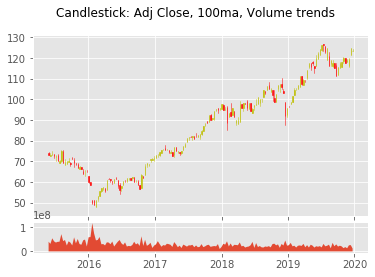

In [63]:
# Candlestick chart will condense all the price, having an ohlc chart that can show those prices in just one trend

ax1 = plt.subplot2grid((6,1),(0,0),rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan = 1, colspan = 1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_axp_ohlc.values, width = 2, colorup = 'y')
ax2.fill_between(df_axp_volume.index.map(mdates.date2num),df_axp_volume.values,0)
plt.suptitle('Candlestick: Adj Close, 100ma, Volume trends')
plt.show()